In [23]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

# Load the dataframe
df = pd.read_json(r"C:\Users\tdhoble\Desktop\Modelling Customer's Feedback on the Product.json", lines=True)
df.head()

,bra size,bust,category,cup size,fit,height,hips,item_id,length,quality,review_summary,review_text,shoe size,shoe width,size,user_id,user_name,waist
0,34.0,36,new,d,small,5ft 6in,38.0,123373,just right,5.0,NaN,NaN,NaN,NaN,7,991571,Emily,29.0
1,36.0,NaN,new,b,small,5ft 2in,30.0,123373,just right,3.0,NaN,NaN,NaN,NaN,13,587883,sydneybraden2001,31.0
2,32.0,NaN,new,b,small,5ft 7in,NaN,123373,slightly long,2.0,NaN,NaN,9.0,NaN,7,395665,Ugggh,30.0
3,NaN,NaN,new,dd/e,fit,NaN,NaN,123373,just right,5.0,NaN,NaN,NaN,NaN,21,875643,alexmeyer626,NaN
4,36.0,NaN,new,b,small,5ft 2in,NaN,123373,slightly long,5.0,NaN,NaN,NaN,NaN,18,944840,dberrones1,NaN


In [2]:
# replace the space with _
df.columns=df.columns.str.strip().str.lower().str.replace(' ', '_')

# Check the percentage of missing value
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/df.shape[0])*100})
print(missing_data)

                total_missing  perc_missing
bra_size                 6018      7.268994
bust                    70936     85.681846
category                    0      0.000000
cup_size                 6255      7.555260
fit                         0      0.000000
height                   1107      1.337118
hips                    26726     32.281677
item_id                     0      0.000000
length                     35      0.042276
quality                    68      0.082136
review_summary           6725      8.122962
review_text              6725      8.122962
shoe_size               54875     66.282160
shoe_width              64183     77.525063
size                        0      0.000000
user_id                     0      0.000000
user_name                   0      0.000000
waist                   79908     96.518903


In [3]:
# drop the the columns
df.drop(['waist', 'bust', 'user_name','review_text','review_summary','shoe_size','shoe_width'], axis=1, inplace=True)

# store independent variable
X = df.drop(['fit'],axis=1)

# store dependent variable
y = df['fit']

# spliting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y ,test_size=0.33,random_state=6)

In [4]:
X_train.sample(5)

,bra_size,category,cup_size,height,hips,item_id,length,quality,size,user_id
40002,34.0,tops,d,5ft 9in,36.0,427567,just right,4.0,12,636039
21653,36.0,dresses,b,5ft 10in,40.0,338596,slightly short,4.0,12,450787
25521,38.0,dresses,d,6ft,38.0,391519,just right,4.0,12,315451
674,34.0,new,c,5ft 1in,34.0,125442,just right,5.0,7,458607
20813,34.0,dresses,a,5ft 7in,35.0,314980,slightly short,4.0,8,975075


category   fit  
bottoms    fit      10660
           small     2548
           large     2058
dresses    fit      13574
           large     2562
           small     2514
new        fit      14423
           small     4087
           large     2978
outerwear  fit       2793
           large      816
           small      614
sale       fit       1590
           small      500
           large      434
tops       fit      13498
           large     4168
           small     2698
wedding    fit        219
           large       43
           small       13
Name: fit, dtype: int64


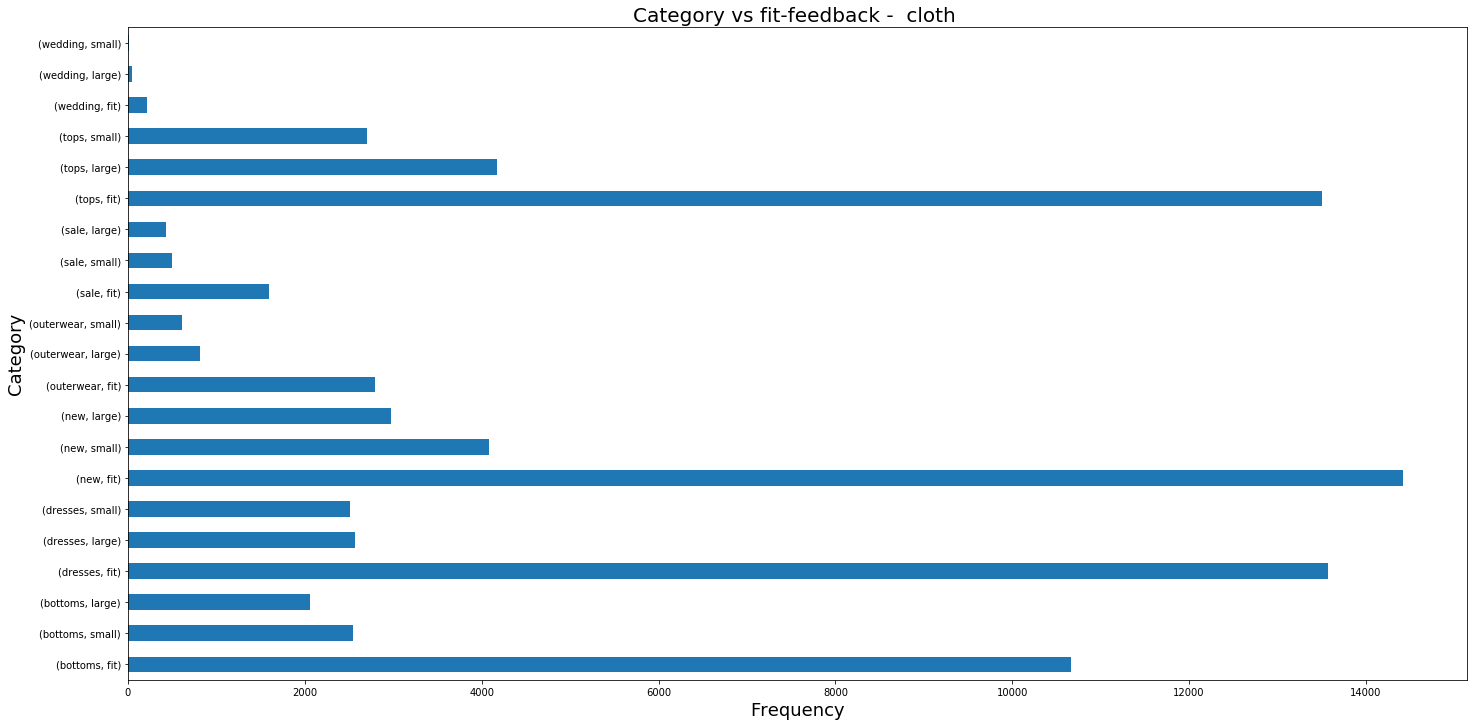

In [5]:
def plot_barh(df,col, cmap = None, stacked=False, norm = None):
    df.plot(kind='barh', colormap=cmap, stacked=stacked)
    fig = plt.gcf()
    fig.set_size_inches(24,12)
    plt.title("Category vs {}-feedback -  cloth {}".format(col, '(Normalized)' if norm else ''), fontsize= 20)
    plt.ylabel('Category', fontsize = 18)
    plot = plt.xlabel('Frequency', fontsize=18)

g_by_category = df.groupby('category')
cat_fit = g_by_category['fit'].value_counts()
print(cat_fit)
cat_fit.unstack()
plot_barh(cat_fit, 'fit')

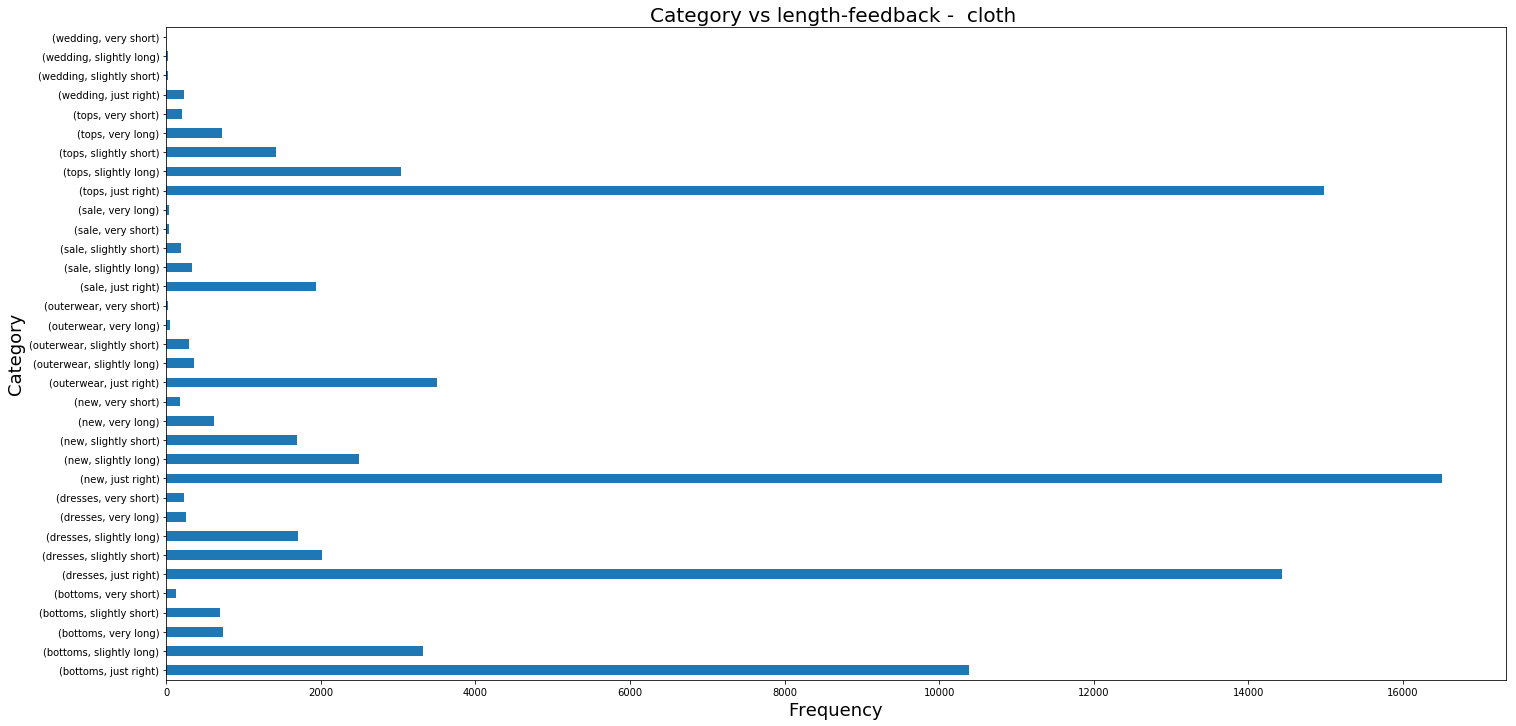

In [6]:
cat_len = g_by_category['length'].value_counts()
cat_len.unstack()
plot_barh(cat_len, 'length')

In [7]:
# Code starts here

def get_cms(x):
    if type(x) == type(1.0):
        return
    try:
        return (int(x[0])*30.48) + (int(x[4:-2])*2.54)
    except:
        return (int(x[0])*30.48)

X_train.height = X_train.height.apply(get_cms)
X_test.height = X_test.height.apply(get_cms)

X_train.sample(5)

,bra_size,category,cup_size,height,hips,item_id,length,quality,size,user_id
54754,32.0,tops,dd/e,167.64,36.0,630114,just right,5.0,4,62683
456,38.0,new,b,NaN,NaN,125442,just right,5.0,7,968605
41618,34.0,tops,b,172.72,38.0,454030,slightly long,4.0,4,257851
72220,34.0,bottoms,d,165.10,40.0,750256,just right,4.0,12,153070
6542,42.0,new,ddd/f,160.02,NaN,152513,just right,5.0,20,8590


In [8]:
# Check the percentage of missing value
missing_data = pd.DataFrame({'total_missing': X_train.isnull().sum(), 'perc_missing': (X_train.isnull().sum()/X_train.shape[0])*100})
print(missing_data)

          total_missing  perc_missing
bra_size           3986      7.185996
category              0      0.000000
cup_size           4150      7.481656
height              728      1.312445
hips              17878     32.230615
item_id               0      0.000000
length               26      0.046873
quality              44      0.079324
size                  0      0.000000
user_id               0      0.000000


In [9]:
X_train = X_train.dropna(axis=0, subset=['height','length','quality'])
X_test = X_test.dropna(axis=0, subset=['height','length','quality'])

y_train=y_train[X_train.index]
y_test=y_test[X_test.index]

X_train['bra_size'].fillna(X_train['bra_size'].mean(), inplace = True)
X_train['hips'].fillna(X_train['hips'].mean(), inplace = True)

X_test['bra_size'].fillna(X_test['bra_size'].mean(), inplace = True)
X_test['hips'].fillna(X_test['hips'].mean(), inplace = True)

In [10]:
mode_1 = X_train['cup_size'].mode()[0]
mode_2 = X_test['cup_size'].mode()[0]
X_train['cup_size']=X_train['cup_size'].replace(np.nan,mode_1)
X_test['cup_size']=X_test['cup_size'].replace(np.nan,mode_2)

X_train.head()

,bra_size,category,cup_size,height,hips,item_id,length,quality,size,user_id
8540,32.0,dresses,b,172.72,38.000000,160625,slightly long,5.0,3,276443
30834,34.0,new,b,165.10,35.000000,407044,just right,2.0,8,980141
6095,36.0,new,d,170.18,45.000000,152513,just right,2.0,15,682176
14462,32.0,dresses,d,152.40,37.000000,171740,just right,4.0,7,459825
37896,42.0,new,c,165.10,40.364358,416942,just right,4.0,26,151852


In [11]:
# one hot encoding
X_train=pd.get_dummies(data=X_train,columns=["category", "cup_size","length"],prefix=["category", "cup_size","length"])
X_test=pd.get_dummies(data=X_test,columns=["category", "cup_size","length"],prefix=["category", "cup_size","length"])

In [22]:
model = DecisionTreeClassifier(random_state=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
print("score : {}, precision : {}".format(score, precision))

score : 0.5751123992122766, precision : [0.72714062 0.28549002 0.26194651]


In [26]:
# parameters for grid search
parameters = {'max_depth':[5,10],'criterion':['gini','entropy'],'min_samples_leaf':[0.5,1]}

model = DecisionTreeClassifier(random_state=6)
grid = GridSearchCV(estimator=model, param_grid = parameters)

grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
print("accuracy : {}, precision : {}".format(accuracy, precision))

accuracy : 0.6955003158324973, precision : [0.70329498 0.52875696 0.56219512]
